In [4]:
import numpy as np
import pandas as pd
#!pip install missingno
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

In [ ]:
data = pd.read_csv("/data/raw/Food_Delivery_Data.csv")

In [6]:
df = data.copy()


In [7]:
df.replace(["NaN ","NaN", "nan","conditions NaN", "NaN  ","NaN "],np.nan, inplace= True)

In [8]:
df.sample(50)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
25589,0xd06e,AGRRES14DEL03,39,4.6,27.161850,78.040165,27.251850,78.130165,18-02-2022,22:10:00,22:20:00,conditions Sunny,Low,2,Meal,scooter,1,No,Metropolitian,(min) 21
39148,0xf1d,JAPRES08DEL03,29,4.9,26.910262,75.783013,27.000262,75.873013,27-03-2022,21:50:00,21:55:00,conditions Sunny,Jam,1,Buffet,scooter,0,No,Urban,(min) 12
40141,0x8551,COIMBRES04DEL01,21,4.8,11.024839,77.007003,11.034839,77.017003,26-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Snack,scooter,0,No,Metropolitian,(min) 28
6898,0xda75,BHPRES12DEL02,35,4.8,0.000000,0.000000,0.080000,0.080000,12-02-2022,20:20:00,20:35:00,conditions Windy,Jam,0,Drinks,motorcycle,1,No,Metropolitian,(min) 45
27344,0x92f1,SURRES17DEL02,20,4.7,21.149569,72.772697,21.279569,72.902697,06-04-2022,23:00:00,23:15:00,conditions Cloudy,Low,2,Drinks,scooter,1,No,Metropolitian,(min) 23
3659,0xd0c5,DEHRES04DEL02,NaN,NaN,30.340722,78.060221,30.360722,78.080221,17-02-2022,NaN,10:45:00,NaN,Low,0,Drinks,motorcycle,1,No,Metropolitian,(min) 20
85,0x56ad,HYDRES04DEL03,24,4.6,17.411028,78.329645,17.471028,78.389645,09-03-2022,20:45:00,20:55:00,conditions Stormy,Jam,1,Buffet,motorcycle,0,No,Metropolitian,(min) 13
1210,0x8029,COIMBRES05DEL03,29,4.5,11.022169,76.999594,11.112169,77.089594,12-03-2022,20:00:00,20:15:00,conditions Sunny,Jam,1,Drinks,motorcycle,0,No,Metropolitian,(min) 23
33022,0x9720,VADRES11DEL02,28,4,22.308096,73.167753,22.388096,73.247753,27-03-2022,21:45:00,21:55:00,conditions Fog,Jam,2,Snack,motorcycle,2,No,Metropolitian,(min) 44
28945,0xca03,GOARES18DEL01,23,4.6,15.493950,73.827423,15.603950,73.937423,14-02-2022,22:55:00,23:05:00,conditions Cloudy,Low,1,Snack,scooter,1,No,Metropolitian,(min) 24


In [9]:
# Calculate % of missing values for each column
missing_percent = df.isnull().sum() * 100 / len(df)

# Combine with total missing count for clarity
missing_summary = pd.DataFrame({
    'Missing_Values': df.isnull().sum(),
    'Missing_Percentage (%)': round(missing_percent, 2)
})

# Sort by missing percentage (descending)
missing_summary = missing_summary.sort_values(by='Missing_Percentage (%)', ascending=False)

print(missing_summary)

                             Missing_Values  Missing_Percentage (%)
Delivery_person_Ratings                1908                    4.18
Delivery_person_Age                    1854                    4.07
Time_Orderd                            1731                    3.80
City                                   1200                    2.63
multiple_deliveries                     993                    2.18
Weatherconditions                       616                    1.35
Road_traffic_density                    601                    1.32
Festival                                228                    0.50
ID                                        0                    0.00
Delivery_person_ID                        0                    0.00
Restaurant_latitude                       0                    0.00
Restaurant_longitude                      0                    0.00
Time_Order_picked                         0                    0.00
Order_Date                                0     

In [10]:
percent_rows_missing = (df.isna().any(axis=1).sum() / df.shape[0]) * 100
print(f"Percentage of rows with missing values: {percent_rows_missing:.2f}%")

Percentage of rows with missing values: 9.27%


<Axes: >

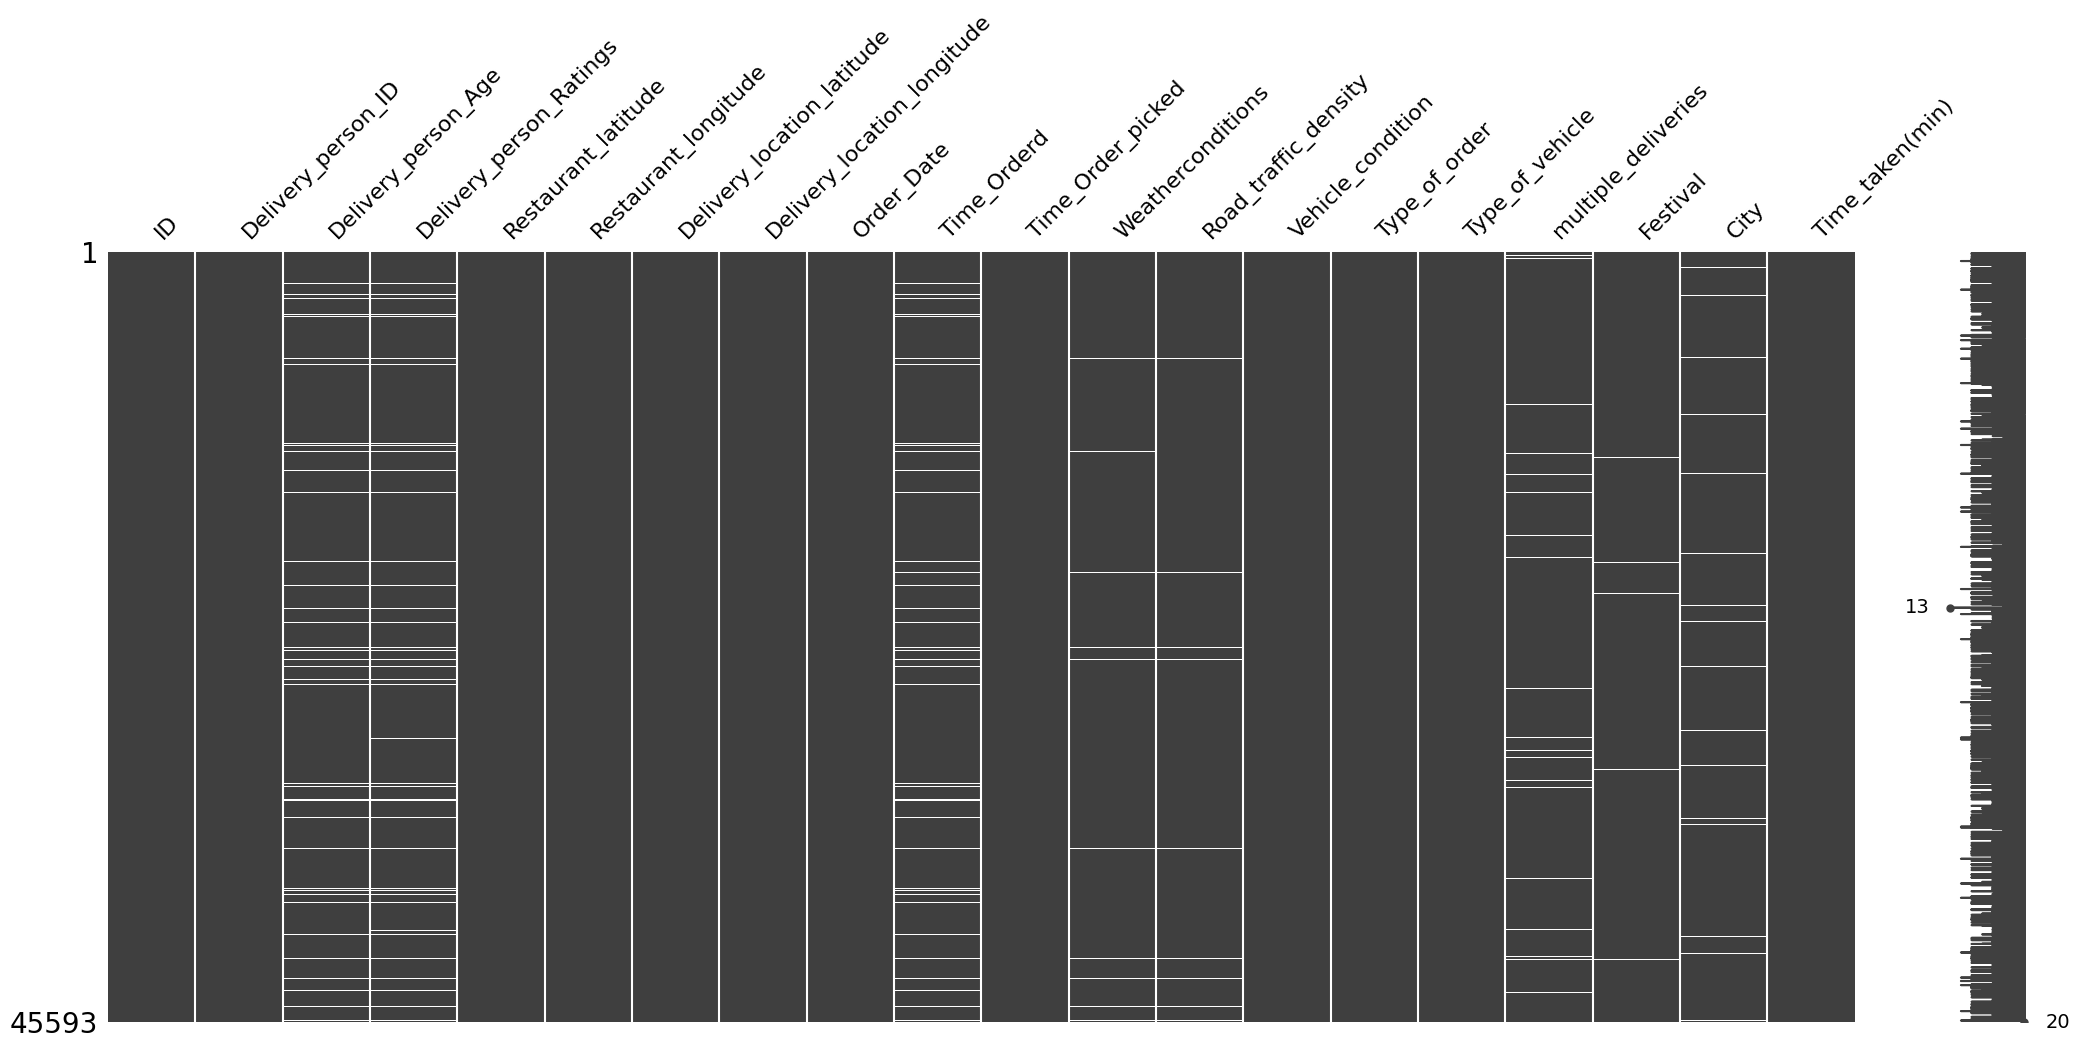

In [11]:
msno.matrix(df)

<Axes: >

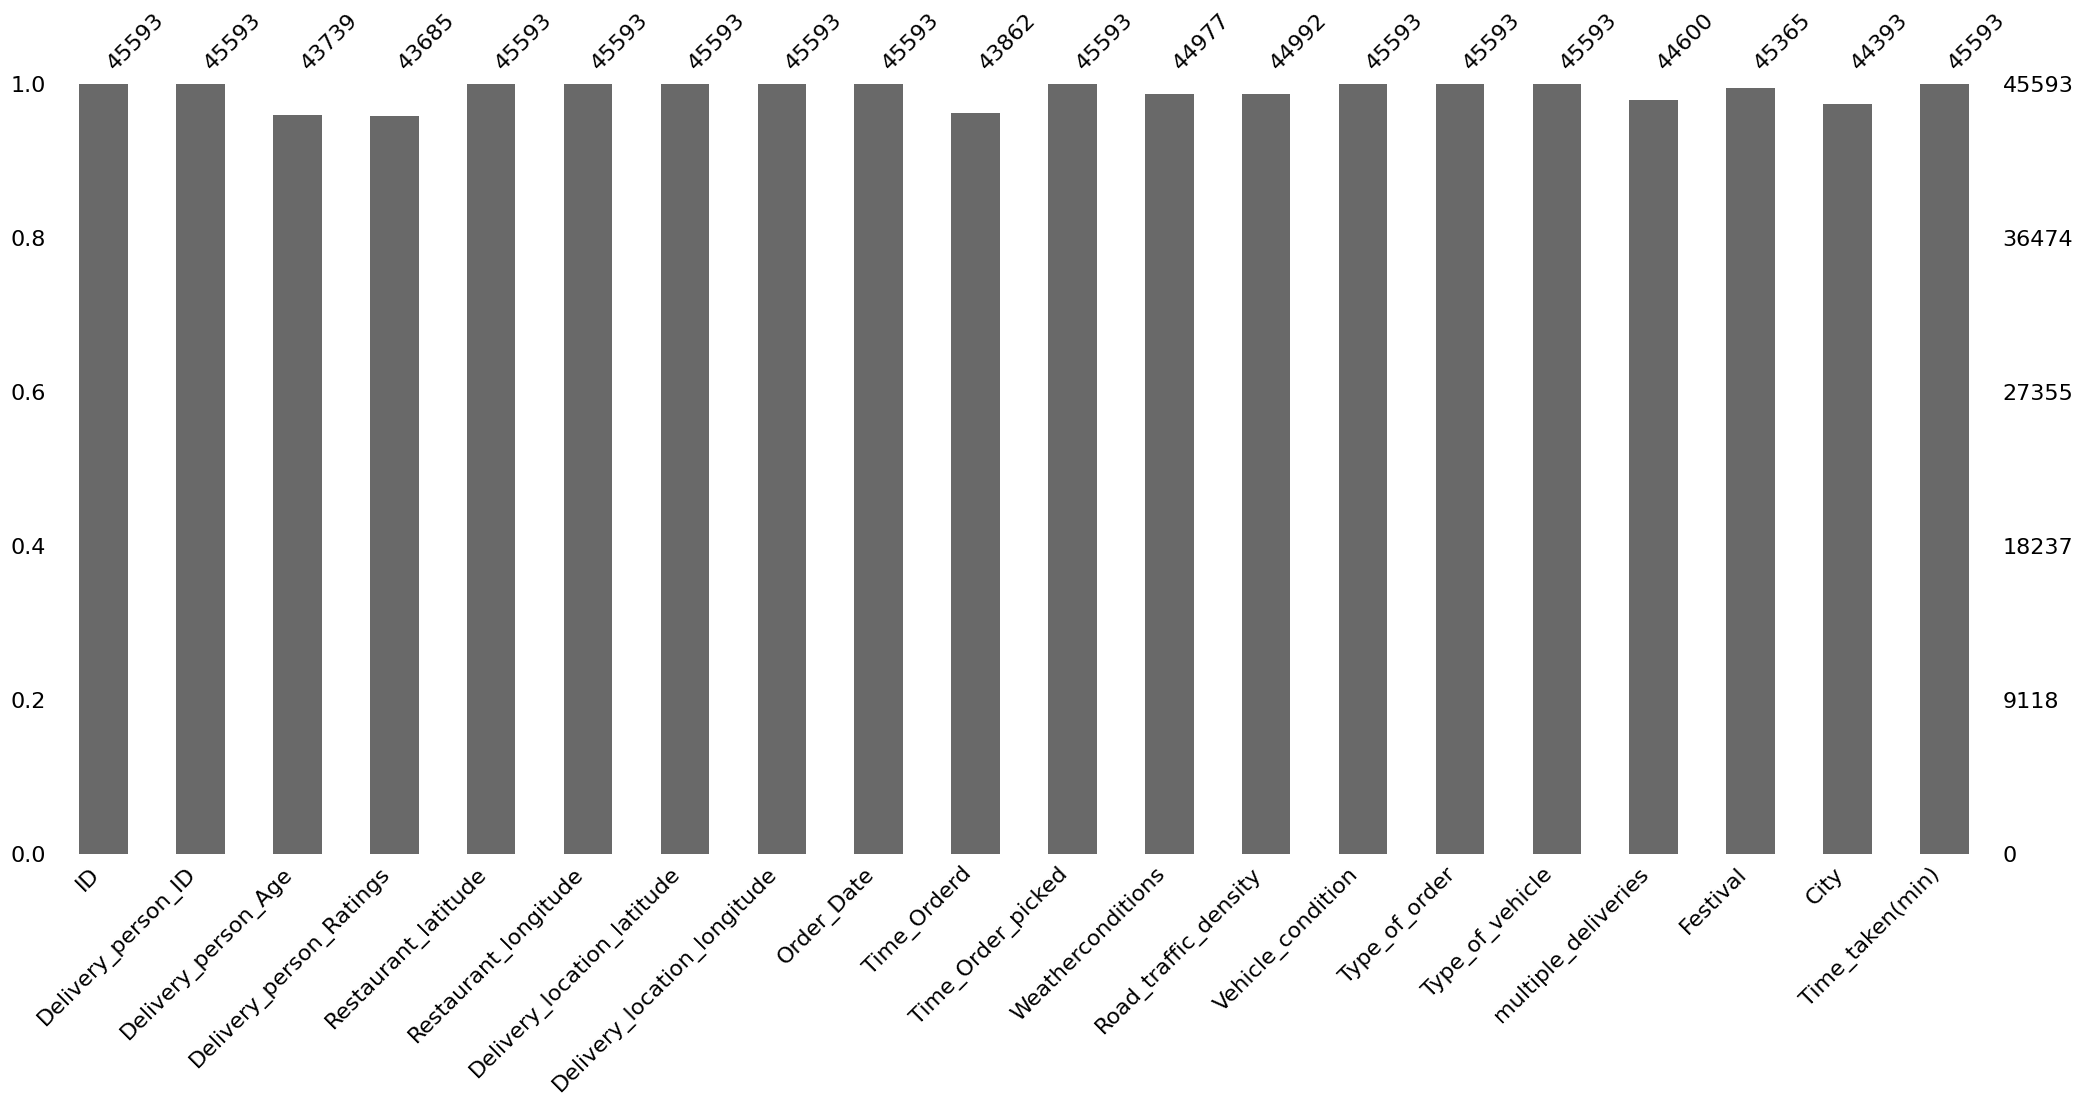

In [12]:
msno.bar(df)

<Axes: >

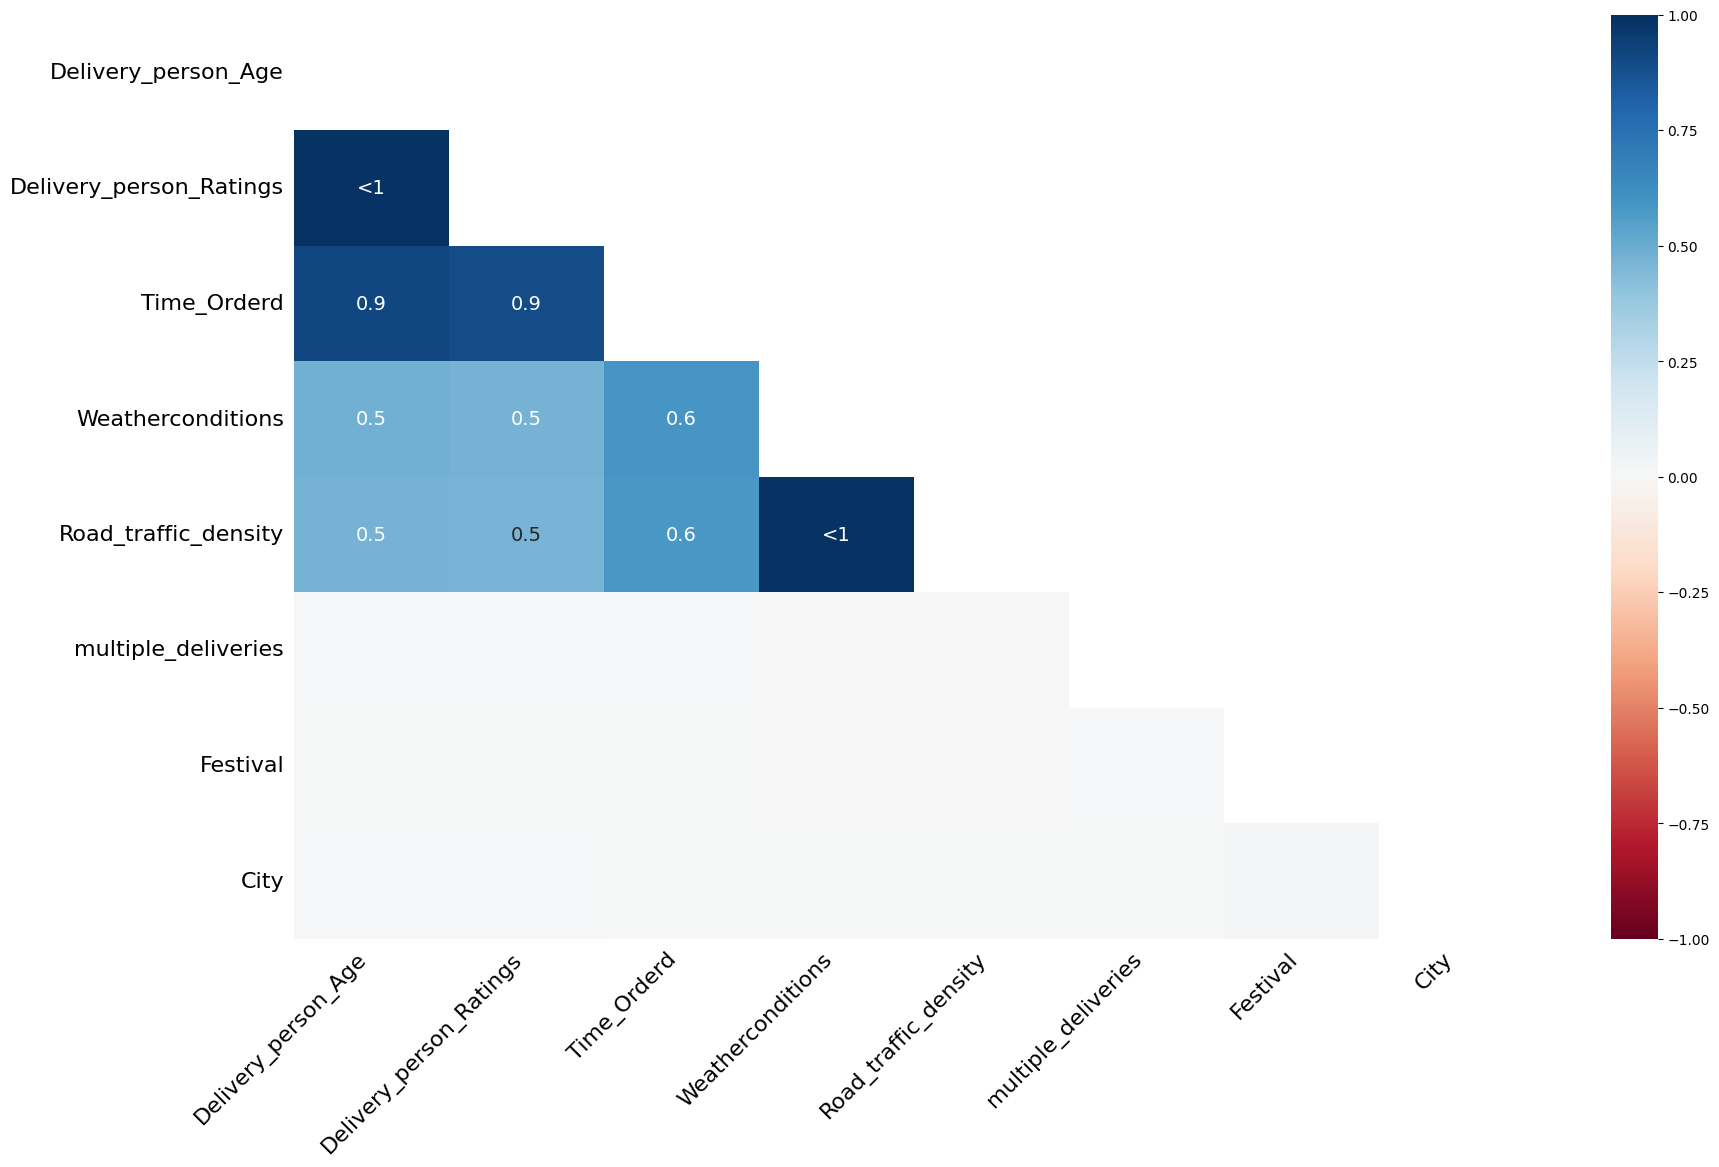

In [13]:
msno.heatmap(df)

<Axes: >

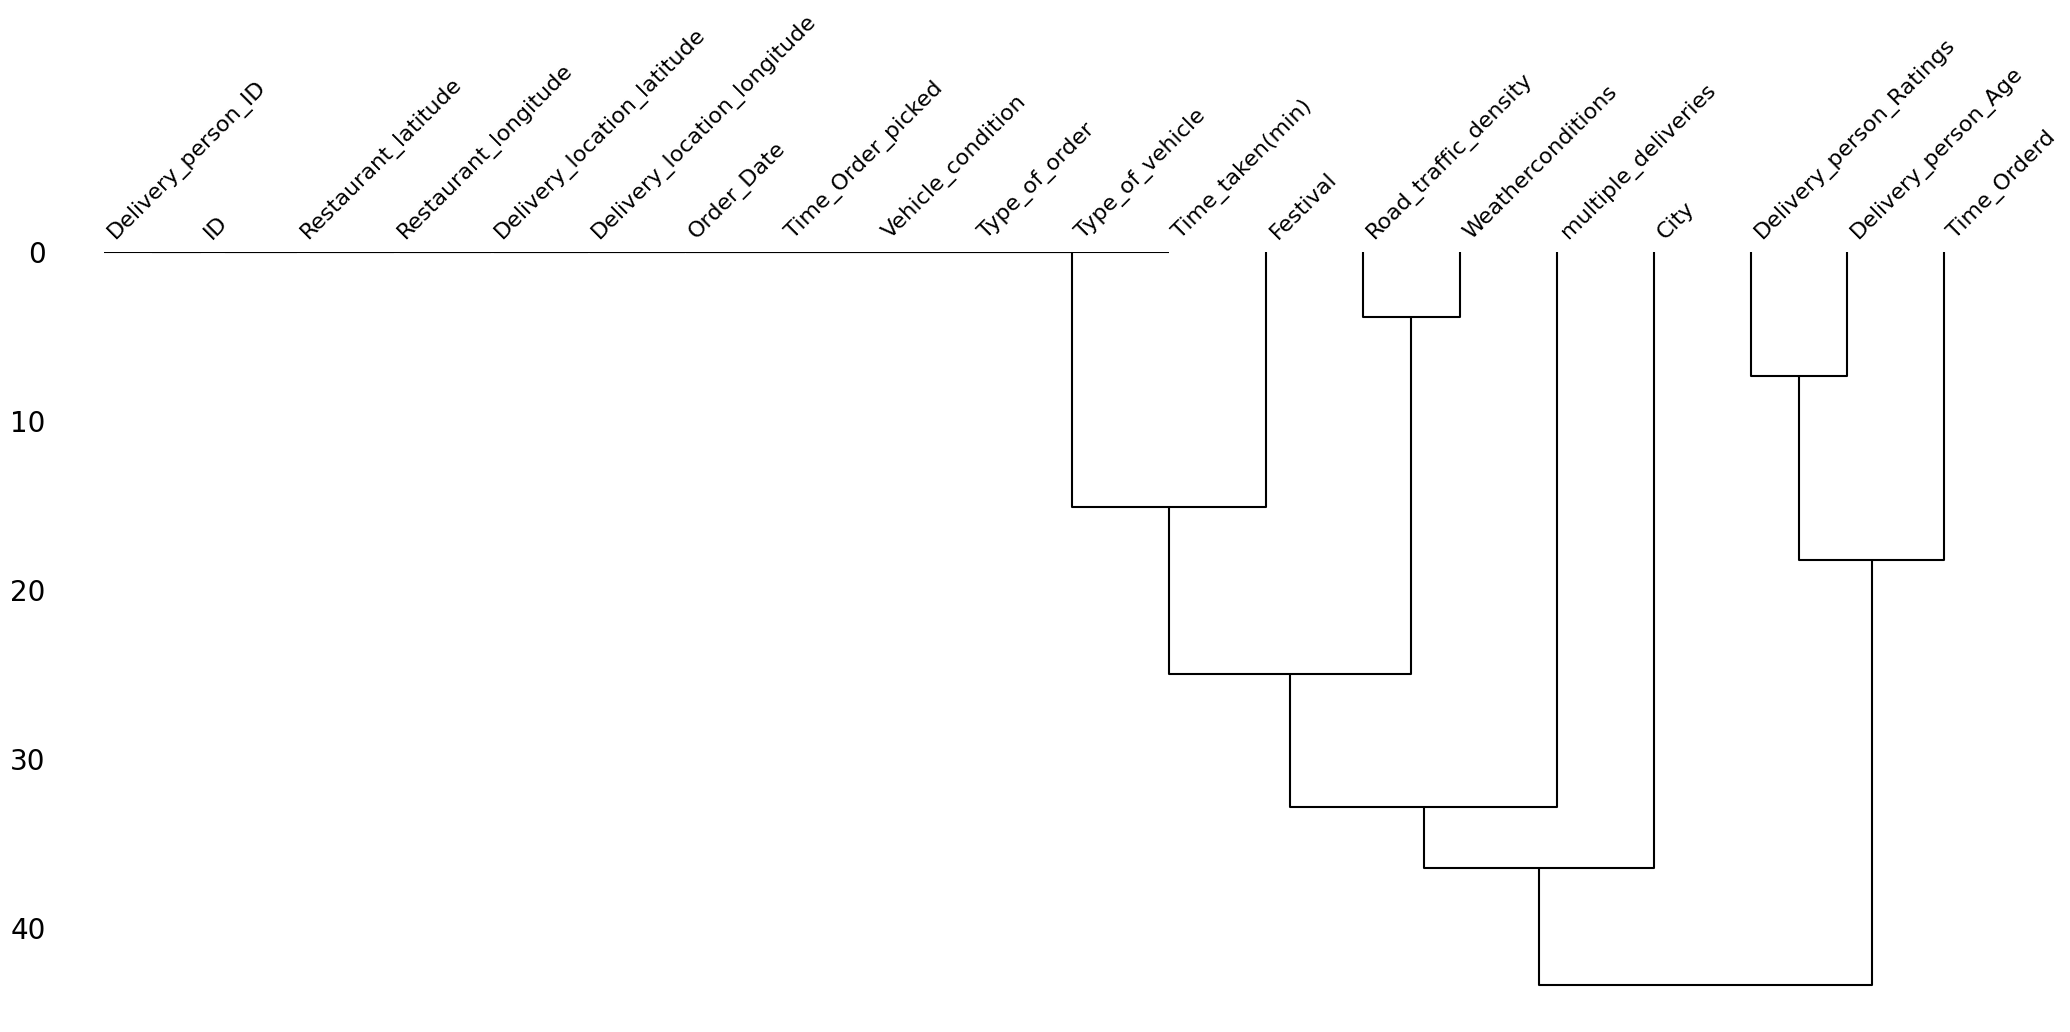

In [14]:
msno.dendrogram(df)

In [15]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [16]:
df['Delivery_person_ID'].head()
df['Delivery_person_ID'].nunique()


1320

In [17]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [18]:
df['Delivery_person_Age'].astype(float).describe()

count    43739.000000
mean        29.567137
std          5.815155
min         15.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         50.000000
Name: Delivery_person_Age, dtype: float64

In [19]:
df.loc[df['Delivery_person_Age'].astype(float) < 18].shape[0]


38

In [20]:
df['Delivery_person_Ratings'].astype(float).describe()

count    43685.000000
mean         4.633780
std          0.334716
min          1.000000
25%          4.500000
50%          4.700000
75%          4.900000
max          6.000000
Name: Delivery_person_Ratings, dtype: float64

In [21]:
df.loc[df['Delivery_person_Ratings'].astype(float) > 5.0].shape[0]

53

In [22]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce', dayfirst=True)


In [23]:
df['Time_Orderd'] = df['Time_Orderd'].astype(str).str.strip().replace(
    ["NaN ","NaN", "nan","conditions NaN", "NaN  ","NaN "],
    np.nan
)

df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S', errors='coerce').dt.time


In [24]:
df['Time_Orderd'].isna().sum()


np.int64(1731)

In [25]:
df['Weatherconditions'] = (
    df['Weatherconditions']
    .astype(str)
    .str.replace('conditions', '', case=False, regex=False)
    .str.strip()
    .replace(["NaN ","NaN", "nan","conditions NaN", "NaN  ","NaN "], np.nan)   # preserve missing values
)


In [26]:
df['Weatherconditions'].isna().sum()


np.int64(616)

In [27]:
df['Road_traffic_density'] = (
    df['Road_traffic_density']
    .astype(str)
    .str.strip()
    .str.title()
    .replace(r'^(Nan|null|None|\s*)$', np.nan, regex=True)
)


In [28]:
df['Road_traffic_density'].isnull().sum()


np.int64(601)

In [29]:
df['Type_of_order'] = (
    df['Type_of_order']
    .str.strip()
    .str.title()    
    .replace(r'^(Nan|null|None|\s*)$', np.nan, regex=True)          
)

In [30]:
df['Type_of_vehicle'] = (
    df['Type_of_vehicle']
    .str.strip()
    .str.title()              
)

In [31]:
df['multiple_deliveries'] = pd.to_numeric(df['multiple_deliveries'], errors='coerce')

In [32]:
df['multiple_deliveries'].isnull().sum()


np.int64(993)

In [33]:
df['Festival'] = (
    df['Festival']
    .str.strip()
    .str.title() 
    .replace(r'^(Nan|null|None|\s*)$', np.nan, regex=True)          
             
)

In [34]:
df['Festival'].isnull().sum()


np.int64(228)

In [35]:
df['City'] = (
    df['City']
    .str.strip()
    .str.title() 
    .replace(r'^(Nan|null|None|\s*)$', np.nan, regex=True)          
             
)

In [36]:
df['City'].isnull().sum()


np.int64(1200)

In [37]:
df['Time_taken(min)'] = (
    df['Time_taken(min)']
    .str.replace("(min) ","")
    .astype(int)

)

In [38]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,2,Snack,Motorcycle,0.0,No,Urban,24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,2,Snack,Scooter,1.0,No,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,Motorcycle,1.0,No,Urban,26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,0,Buffet,Motorcycle,1.0,No,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,1,Snack,Scooter,1.0,No,Metropolitian,30


In [39]:
num_df = df.select_dtypes(include=[np.number])
num_df

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken(min)
0,22.745049,75.892471,22.765049,75.912471,2,0.0,24
1,12.913041,77.683237,13.043041,77.813237,2,1.0,33
2,12.914264,77.678400,12.924264,77.688400,0,1.0,26
3,11.003669,76.976494,11.053669,77.026494,0,1.0,21
4,12.972793,80.249982,13.012793,80.289982,1,1.0,30
...,...,...,...,...,...,...,...
45588,26.902328,75.794257,26.912328,75.804257,1,0.0,32
45589,0.000000,0.000000,0.070000,0.070000,0,1.0,36
45590,13.022394,80.242439,13.052394,80.272439,1,0.0,16
45591,11.001753,76.986241,11.041753,77.026241,0,1.0,26


In [40]:
df[['Restaurant_latitude', 'Restaurant_longitude', 
    'Delivery_location_latitude', 'Delivery_location_longitude']].describe()


,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
count,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702
std,8.185109,22.883647,7.335122,21.118812
min,-30.905562,-88.366217,0.010000,0.010000
25%,12.933284,73.170000,12.988453,73.280000
50%,18.546947,75.898497,18.633934,76.002574
75%,22.728163,78.044095,22.785049,78.107044
max,30.914057,88.433452,31.054057,88.563452


In [41]:
cols = ['Restaurant_latitude', 'Restaurant_longitude', 
        'Delivery_location_latitude', 'Delivery_location_longitude']

# Convert to numeric (in case strings exist)
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

# Replace out-of-range values with NaN
df.loc[(df['Restaurant_latitude'] < 6) | (df['Restaurant_latitude'] > 37), 'Restaurant_latitude'] = np.nan
df.loc[(df['Restaurant_longitude'] < 68) | (df['Restaurant_longitude'] > 98), 'Restaurant_longitude'] = np.nan
df.loc[(df['Delivery_location_latitude'] < 6) | (df['Delivery_location_latitude'] > 37), 'Delivery_location_latitude'] = np.nan
df.loc[(df['Delivery_location_longitude'] < 68) | (df['Delivery_location_longitude'] > 98), 'Delivery_location_longitude'] = np.nan


In [42]:
df[cols].isna().sum()


Restaurant_latitude            4071
Restaurant_longitude           3802
Delivery_location_latitude     3640
Delivery_location_longitude    3640
dtype: int64

In [43]:
# Convert to numeric (turn 'NaN' text → np.nan)
df['Delivery_person_Age'] = pd.to_numeric(df['Delivery_person_Age'], errors='coerce')

# Remove unrealistic values (age < 18 or age > 70)
df.loc[(df['Delivery_person_Age'] < 18) | (df['Delivery_person_Age'] > 70), 'Delivery_person_Age'] = np.nan

# Check result
print(df['Delivery_person_Age'].describe())
print("Missing after cleaning:", df['Delivery_person_Age'].isna().sum())


count    43701.000000
mean        29.579804
std          5.801789
min         20.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         50.000000
Name: Delivery_person_Age, dtype: float64
Missing after cleaning: 1892


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45593 non-null  object        
 1   Delivery_person_ID           45593 non-null  object        
 2   Delivery_person_Age          43701 non-null  float64       
 3   Delivery_person_Ratings      43685 non-null  object        
 4   Restaurant_latitude          41522 non-null  float64       
 5   Restaurant_longitude         41791 non-null  float64       
 6   Delivery_location_latitude   41953 non-null  float64       
 7   Delivery_location_longitude  41953 non-null  float64       
 8   Order_Date                   45593 non-null  datetime64[ns]
 9   Time_Orderd                  43862 non-null  object        
 10  Time_Order_picked            45593 non-null  object        
 11  Weatherconditions            44977 non-nu

In [45]:
# Calculate % of missing values for each column
missing_percent = df.isnull().sum() * 100 / len(df)

# Combine with total missing count for clarity
missing_summary = pd.DataFrame({
    'Missing_Values': df.isnull().sum(),
    'Missing_Percentage (%)': round(missing_percent, 2)
})

# Sort by missing percentage (descending)
missing_summary = missing_summary.sort_values(by='Missing_Percentage (%)', ascending=False)

print(missing_summary)

                             Missing_Values  Missing_Percentage (%)
Restaurant_latitude                    4071                    8.93
Restaurant_longitude                   3802                    8.34
Delivery_location_longitude            3640                    7.98
Delivery_location_latitude             3640                    7.98
Delivery_person_Ratings                1908                    4.18
Delivery_person_Age                    1892                    4.15
Time_Orderd                            1731                    3.80
City                                   1200                    2.63
multiple_deliveries                     993                    2.18
Weatherconditions                       616                    1.35
Road_traffic_density                    601                    1.32
Festival                                228                    0.50
ID                                        0                    0.00
Delivery_person_ID                        0     

<Figure size 1200x600 with 0 Axes>

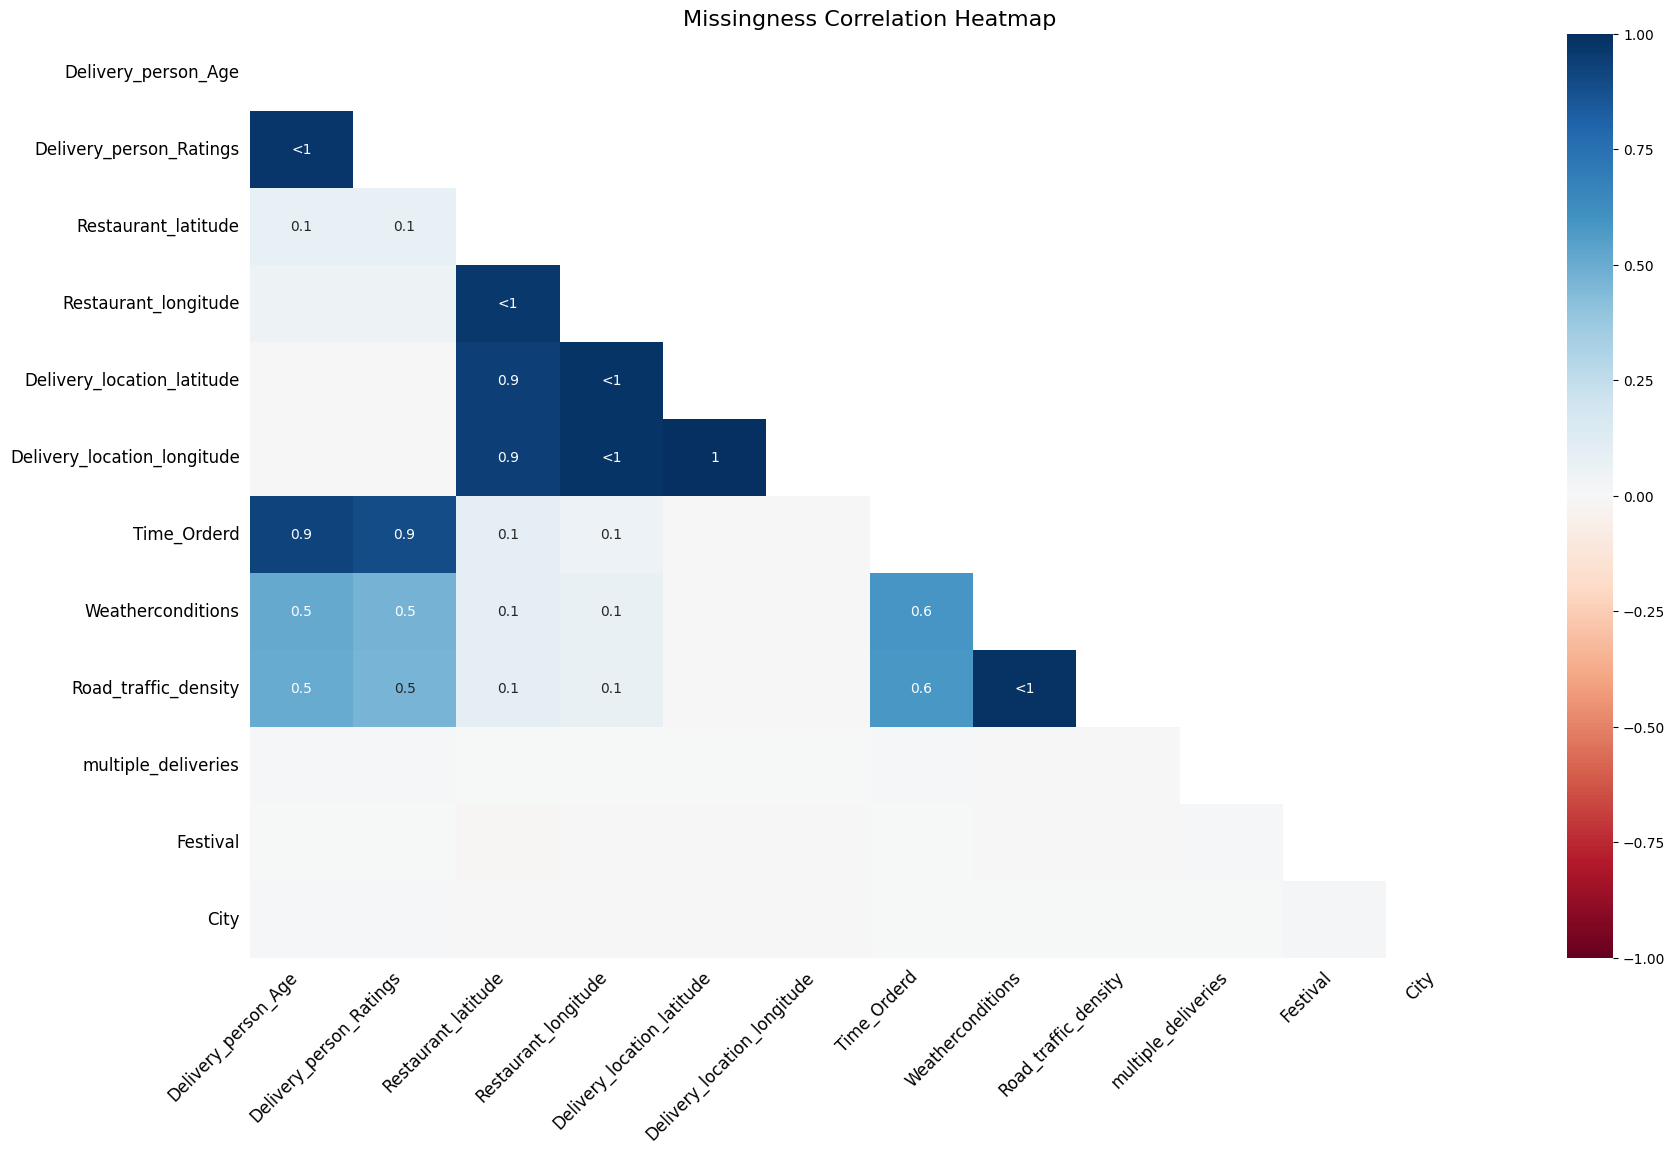

In [46]:
plt.figure(figsize=(12,6))
msno.heatmap(df, fontsize=12)
plt.title("Missingness Correlation Heatmap", fontsize=16)
plt.show()

| Column Pair                                            | Missingness Correlation | Meaning                                                                                                |
| ------------------------------------------------------ | ----------------------- | ------------------------------------------------------------------------------------------------------ |
| **Restaurant_latitude ↔ Delivery_location_latitude**   | **~0.9**                | If one is missing, the other is almost always missing too → These records are incomplete for location. |
| **Restaurant_longitude ↔ Delivery_location_longitude** | **~0.9**                | Same as above — both missing means the model can't compute distance.                                   |
| **Time_Orderd ↔ Delivery_person_Ratings**              | **~0.9**                | When the time isn't logged, ratings are usually missing too (probably same operational issue).         |
| **Weatherconditions ↔ Road_traffic_density**           | **~0.6**                | These environment fields missing together → likely due to record entry issue.                          |


<Figure size 1200x600 with 0 Axes>

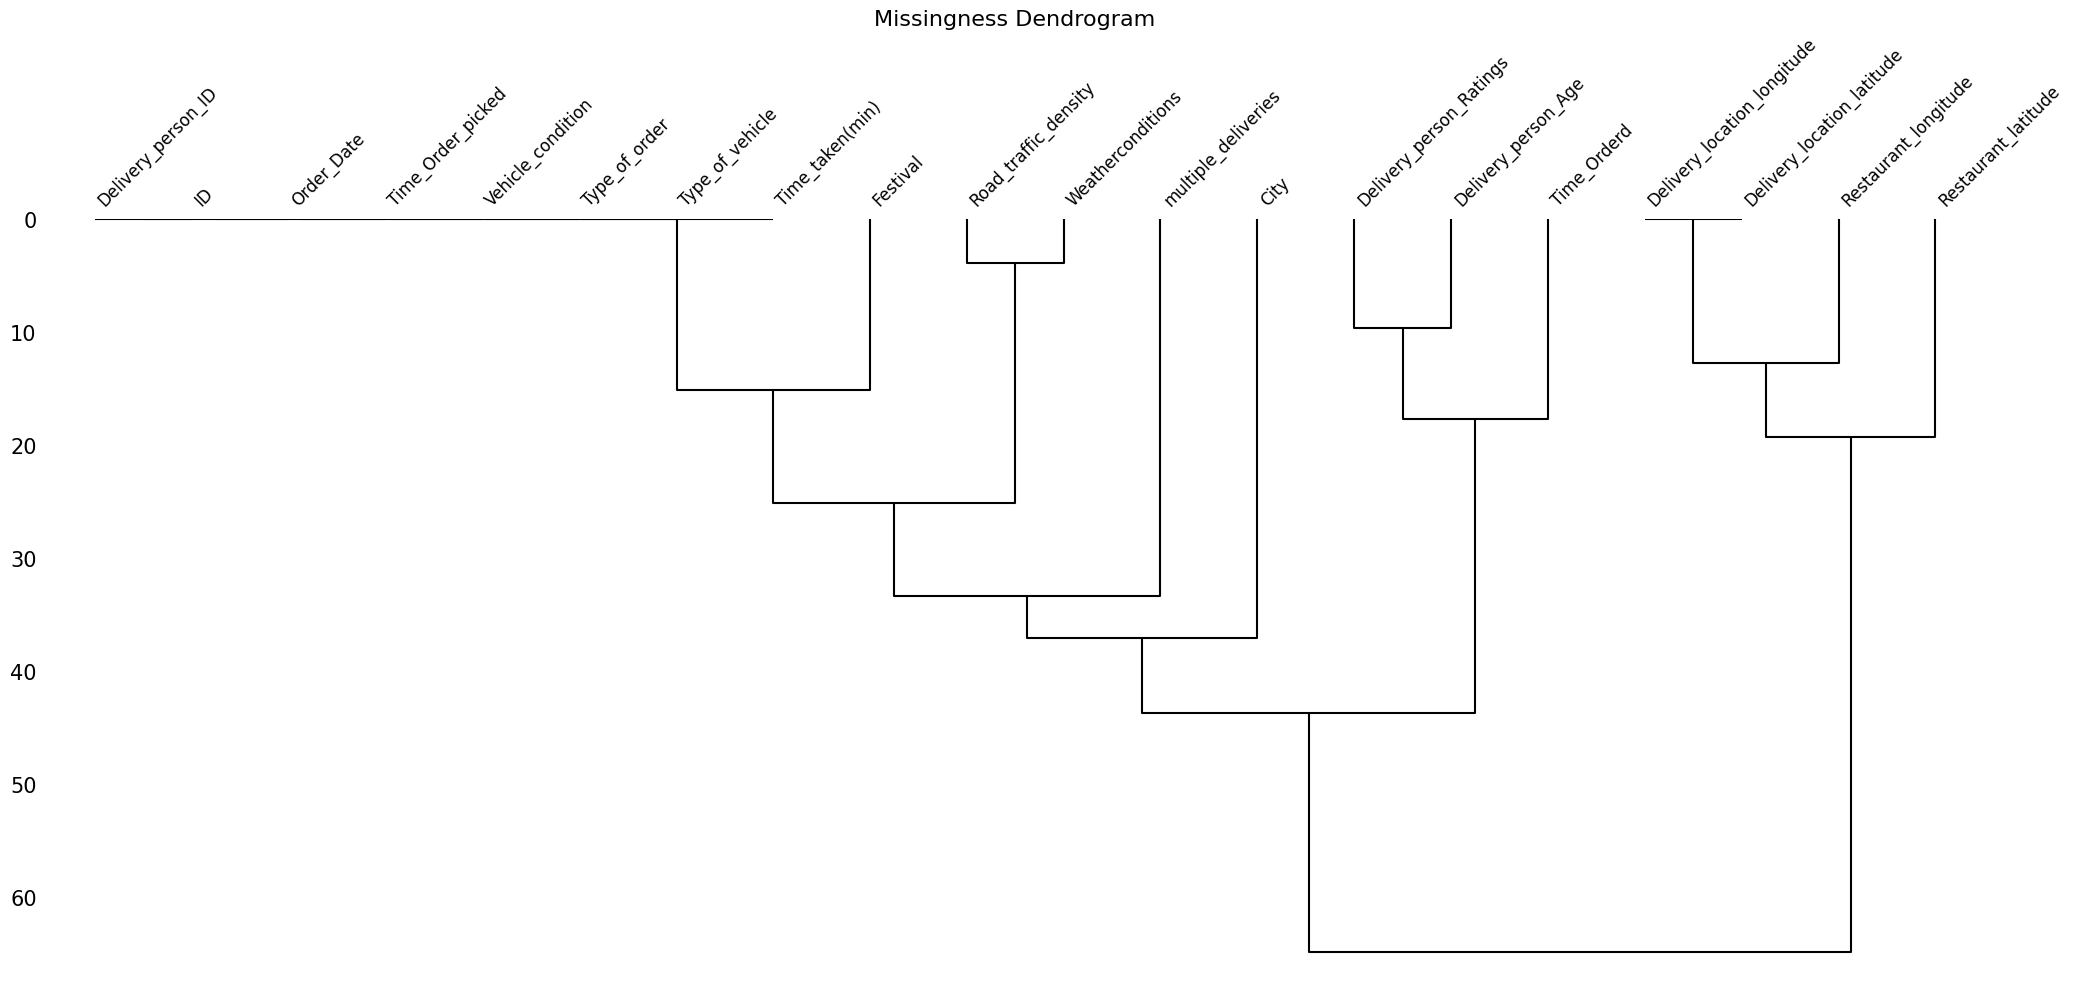

In [47]:
plt.figure(figsize=(12,6))
msno.dendrogram(df, fontsize=12)
plt.title("Missingness Dendrogram", fontsize=16)
plt.show()

<Figure size 1200x600 with 0 Axes>

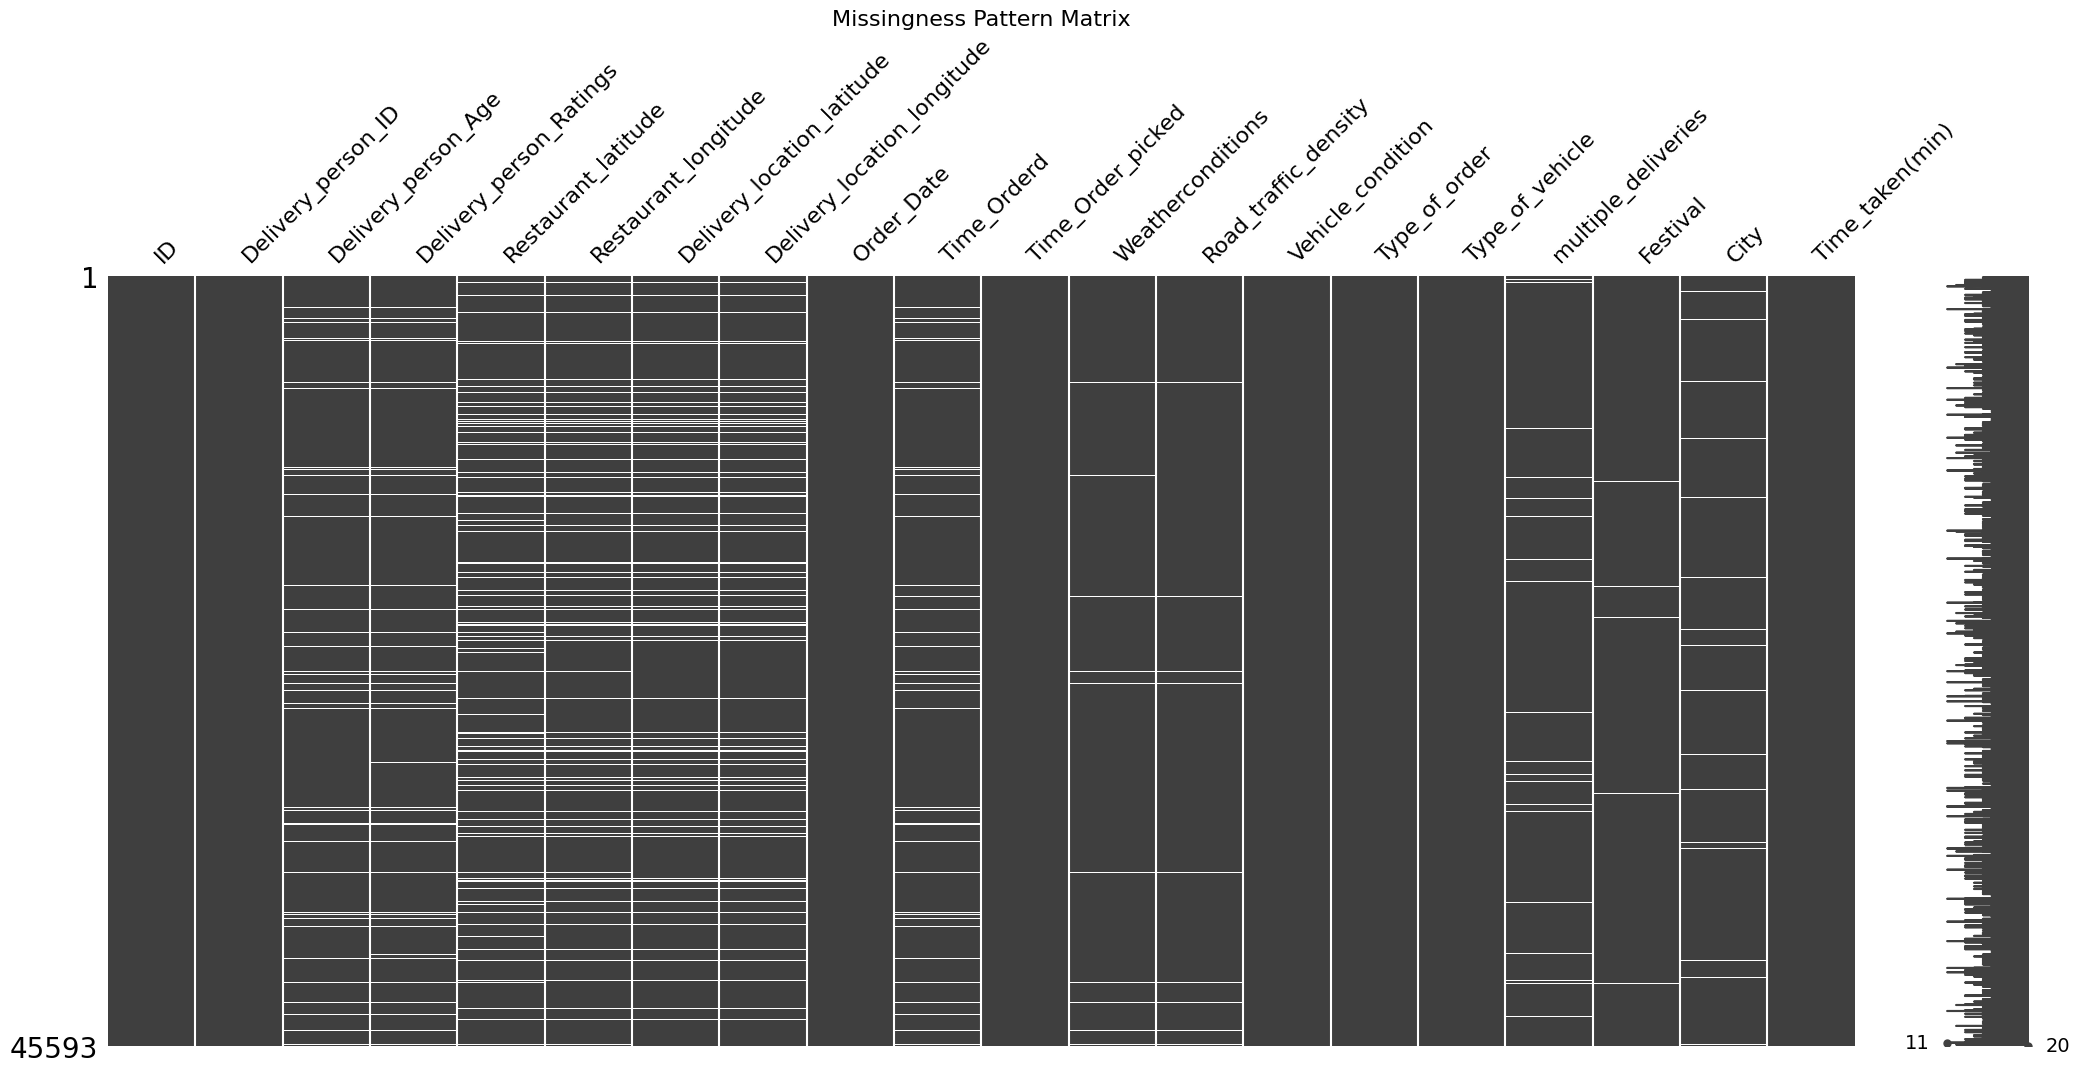

In [48]:
plt.figure(figsize=(12,6))
msno.matrix(df)
plt.title("Missingness Pattern Matrix", fontsize=16)
plt.show()


| Column Group                                 | Missingness Type | How to Impute                                                       |
| -------------------------------------------- | ---------------- | ------------------------------------------------------------------- |
| **Time_Orderd + Order_Time Features**        | **MAR**          | Impute together (e.g., most common time per restaurant/time-slot)   |
| **Location Coordinates + Distance**          | **MAR**          | City-wise median (already done correctly ✅)                         |
| **Weatherconditions & Road_traffic_density** | **MAR**          | Joint imputation (e.g., knn-imputer or model-based)                 |
| **Delivery_person_Ratings**                  | **MCAR**         | Simple mean/median imputation works                                 |
| **Delivery_person_Age**                      | **MNAR**         | **Do NOT mean impute** → Use **model-based imputation or keep NaN** |


In [49]:
df['Delivery_person_Age'] = pd.to_numeric(df['Delivery_person_Age'], errors='coerce')
df.loc[df['Delivery_person_Age'] < 18, 'Delivery_person_Age'] = np.nan


In [50]:
df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce')
df.loc[(df['Delivery_person_Ratings'] < 1) | (df['Delivery_person_Ratings'] > 5),
       'Delivery_person_Ratings'] = np.nan


In [51]:

num_cols = ['Delivery_person_Age','Delivery_person_Ratings','multiple_deliveries']

# imputer = IterativeImputer(estimator=BayesianRidge())
# df[num_cols] = imputer.fit_transform(df[num_cols])

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
df[num_cols] = imputer.fit_transform(df[num_cols])



In [52]:

coord_cols = ['Restaurant_latitude','Restaurant_longitude',
              'Delivery_location_latitude','Delivery_location_longitude']

imputer = IterativeImputer()
df[coord_cols] = imputer.fit_transform(df[coord_cols])


In [53]:
def random_imputation(df, col):
    missing = df[col].isnull()
    df.loc[missing, col] = np.random.choice(df[col].dropna(), missing.sum(), replace=True)

for col in ['City', 'Weatherconditions', 'Road_traffic_density', 'Festival']:
    random_imputation(df, col)


In [54]:
df['multiple_deliveries'].fillna(df['multiple_deliveries'].median(), inplace=True)


/tmp/ipykernel_4844/910032682.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['multiple_deliveries'].fillna(df['multiple_deliveries'].median(), inplace=True)


In [55]:
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S', errors='coerce').dt.time

df['Order_Placed'] = pd.to_datetime(
        df['Order_Date'].astype(str) + ' ' + df['Time_Orderd'].astype(str),
        format='%Y-%m-%d %H:%M:%S', errors='coerce'
    )

df['Order_Hour'] = df['Order_Placed'].dt.hour
df['Order_Minute'] = df['Order_Placed'].dt.minute
df['Order_Time_Category'] = pd.cut(
        df['Order_Hour'],
        bins=[0, 6, 12, 17, 21, 24],
        labels=['Night', 'Morning', 'Afternoon', 'Evening', 'Late Night'],
        right=False
    )

In [56]:
# Compute global mode for fallback
global_mode = df['Order_Time_Category'].mode()[0]

# Group-wise mode imputation
df['Order_Time_Category'] = (
    df.groupby(['Restaurant_latitude', 'Restaurant_longitude'])['Order_Time_Category']
      .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else global_mode))
)

# Drop unwanted columns
df.drop(columns=['Time_Orderd', 'Order_Placed', 'Order_Hour', 'Order_Minute'], inplace=True)


In [57]:
# Calculate % of missing values for each column
missing_percent = df.isnull().sum() * 100 / len(df)

# Combine with total missing count for clarity
missing_summary = pd.DataFrame({
    'Missing_Values': df.isnull().sum(),
    'Missing_Percentage (%)': round(missing_percent, 2)
})

# Sort by missing percentage (descending)
missing_summary = missing_summary.sort_values(by='Missing_Percentage (%)', ascending=False)

print(missing_summary)

                             Missing_Values  Missing_Percentage (%)
ID                                        0                     0.0
Delivery_person_ID                        0                     0.0
Delivery_person_Age                       0                     0.0
Delivery_person_Ratings                   0                     0.0
Restaurant_latitude                       0                     0.0
Restaurant_longitude                      0                     0.0
Delivery_location_latitude                0                     0.0
Delivery_location_longitude               0                     0.0
Order_Date                                0                     0.0
Time_Order_picked                         0                     0.0
Weatherconditions                         0                     0.0
Road_traffic_density                      0                     0.0
Vehicle_condition                         0                     0.0
Type_of_order                             0     

<Figure size 1200x600 with 0 Axes>

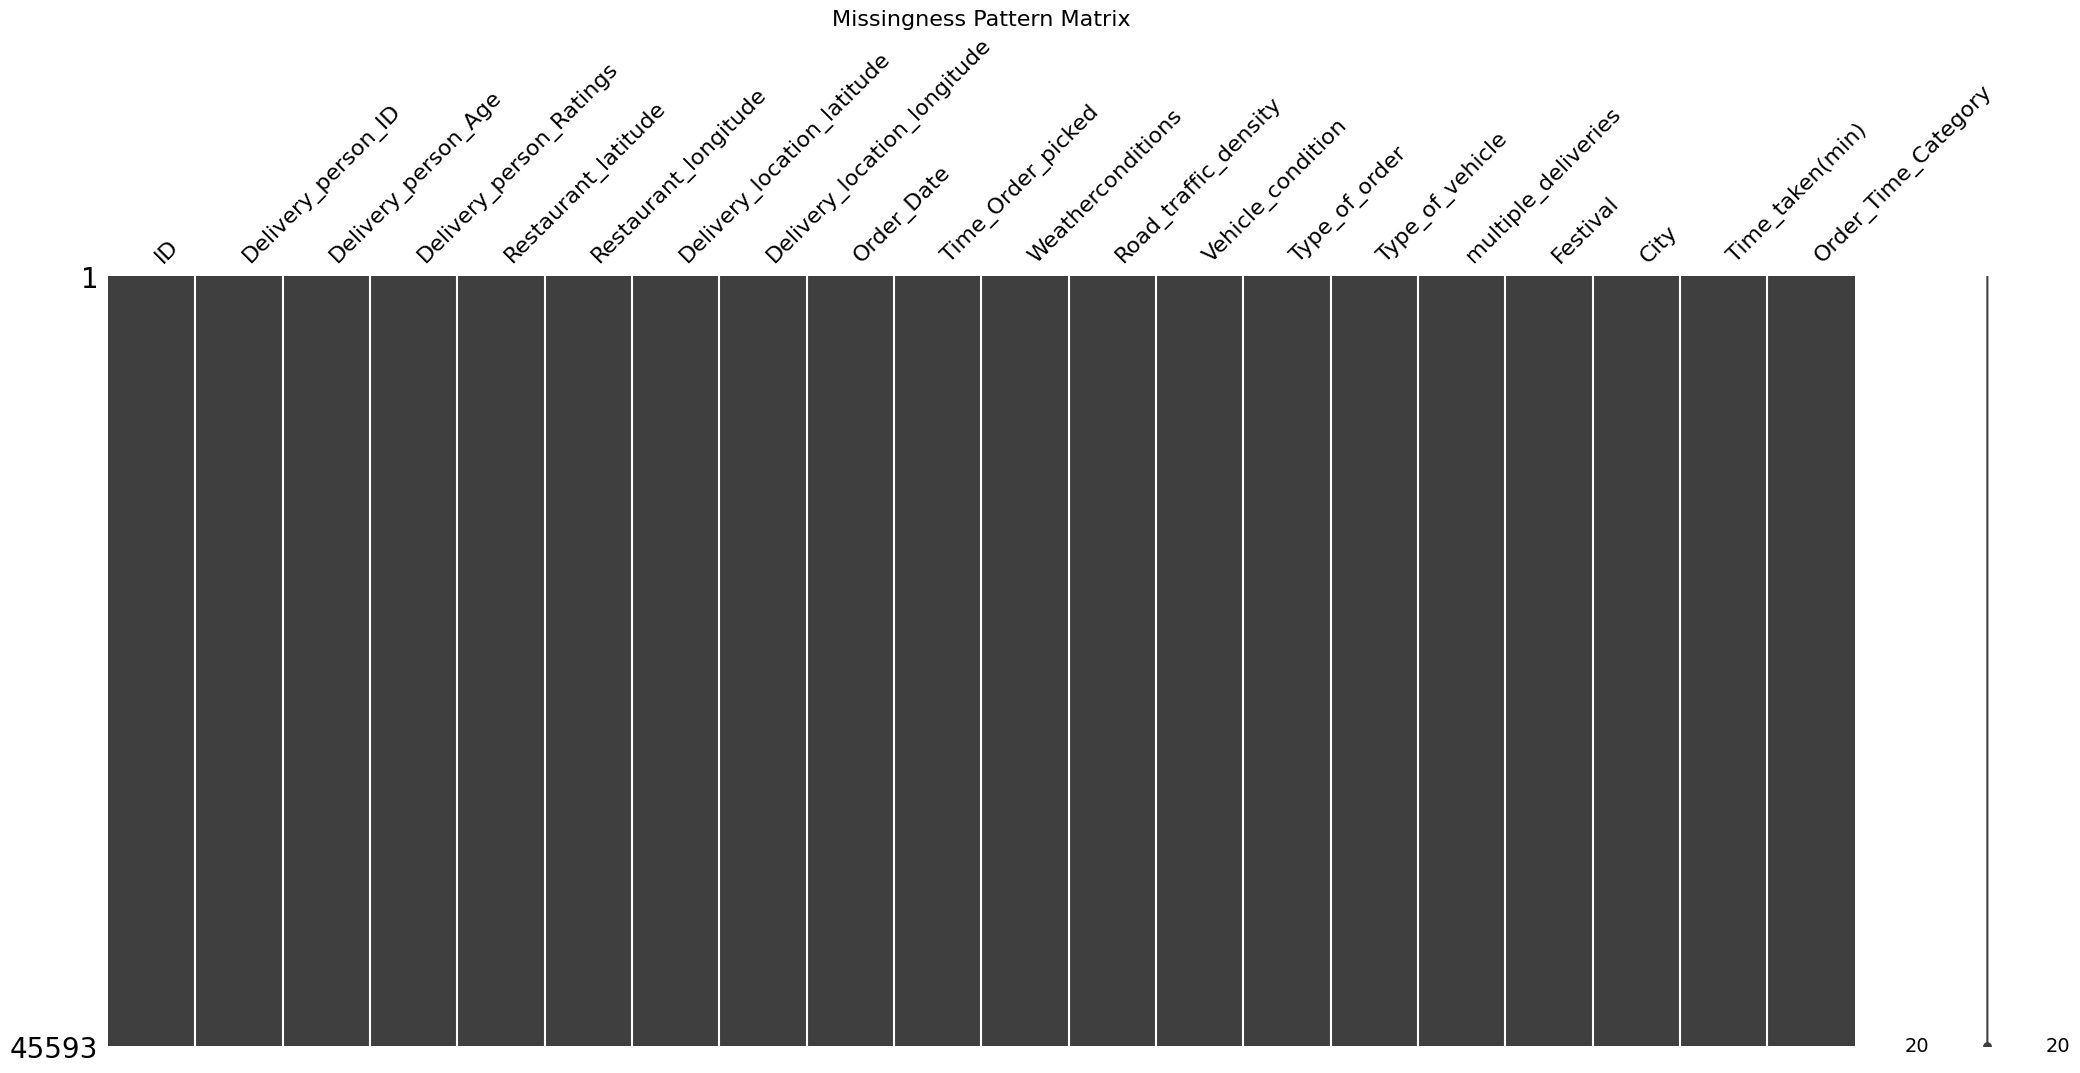

In [58]:
plt.figure(figsize=(12,6))
msno.matrix(df)
plt.title("Missingness Pattern Matrix", fontsize=16)
plt.show()
